<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><span><a href="#particular-cap." data-toc-modified-id="particular-cap.-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>particular cap.</a></span></li></ul></div>

In [1]:
import sys
sys.path.append('..')

In [2]:
import taiko as tk
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
import posixpath
from skimage.io import imshow, imsave, imread
import os

sns.set(font_scale=2)

Using TensorFlow backend.


In [3]:
record_files = glob('../data/alpha/*/*/record_table.csv')
record_dfs = []
for record_file_path in record_files:
    record_df = pd.read_csv(record_file_path)
    record_dfs.append(record_df)
record_df = pd.concat(record_dfs, ignore_index=True)

record_df = record_df[(record_df['song_id'] >= 1) & (record_df['song_id'] <= 4)]
record_df

,drummer_name,song_id,left_sensor_datetime,right_sensor_datetime,capture_datetime
1,aaaaa,1,L_2018-09-28_111304.csv,R_2018-09-28_111305.csv,capture_2018_09_28_11_13_05
2,aaaaa,2,L_2018-09-28_111610.csv,R_2018-09-28_111611.csv,capture_2018_09_28_11_16_11
3,aaaaa,3,L_2018-09-28_111936.csv,R_2018-09-28_111937.csv,capture_2018_09_28_11_19_37
4,aaaaa,4,L_2018-09-28_112353.csv,R_2018-09-28_112355.csv,capture_2018_09_28_11_23_55
5,aaaaa,1,L_2018-09-28_112912.csv,R_2018-09-28_112913.csv,capture_2018_09_28_11_29_13
6,aaaaa,2,L_2018-09-28_113242.csv,R_2018-09-28_113244.csv,capture_2018_09_28_11_32_44
7,aaaaa,3,L_2018-09-28_113531.csv,R_2018-09-28_113532.csv,capture_2018_09_28_11_35_32
8,aaaaa,4,L_2018-09-28_113909.csv,R_2018-09-28_113910.csv,capture_2018_09_28_11_39_10
9,aaaaa,1,L_2018-09-28_114340.csv,R_2018-09-28_114340.csv,capture_2018_09_28_11_43_41
10,aaaaa,2,L_2018-09-28_114710.csv,R_2018-09-28_114713.csv,capture_2018_09_28_11_47_13


In [4]:
# record_df['drummer_name'].idxmax()

Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead
drummer_name                              chris
song_id                                       4
p_order                                       4
capture_datetime    capture_2018_09_26_14_18_35
auc                                     20629.3
Name: 158, dtype: object


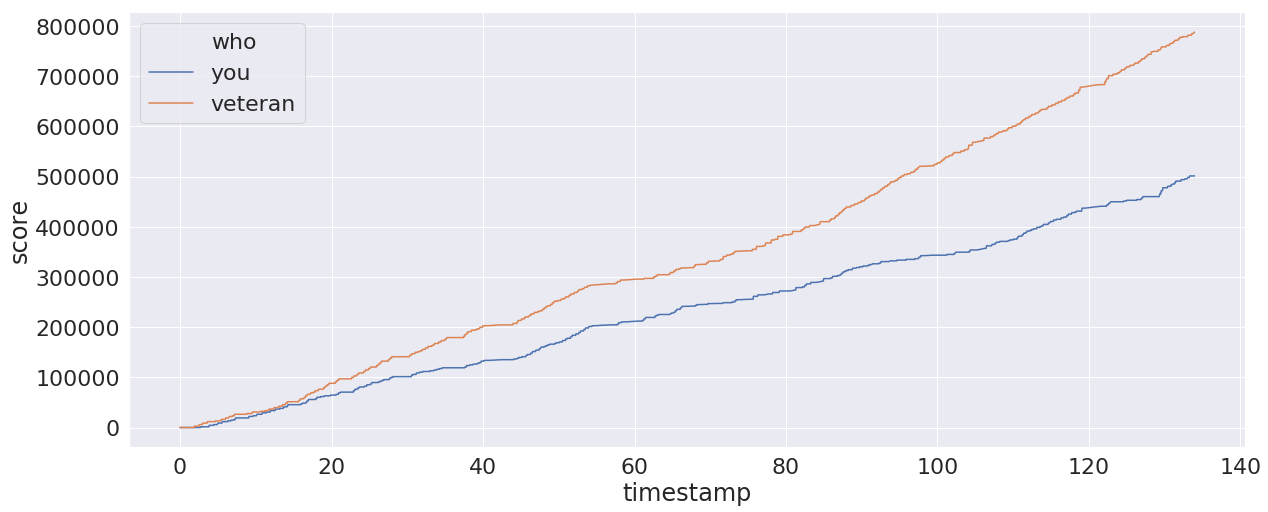

Filename: ../taiko/visualize.py

Line #    Mem usage    Increment   Line Contents
    13    337.4 MiB    337.4 MiB   @profile
    14                             def plot_play_score(capture_dir_path, song_id, compare_veteran=False):
    15   2724.2 MiB   2386.8 MiB       timestamps, img_scores = read_score_board_info(capture_dir_path, song_id)
    16   2724.2 MiB      0.0 MiB       whos = ['you'] * len(timestamps)
    17   2724.2 MiB      0.0 MiB       if compare_veteran:
    18   2724.8 MiB      0.6 MiB           veteran_timestamps, veteran_img_scores = get_best_score_board_info(song_id)
    19   2724.8 MiB      0.0 MiB           timestamps.extend(veteran_timestamps)
    20   2724.8 MiB      0.0 MiB           img_scores.extend(veteran_img_scores)
    21   2724.8 MiB      0.0 MiB           whos.extend(['veteran'] * len(veteran_timestamps))
    22                             
    23   2724.8 MiB      0.0 MiB       score_df = pd.DataFrame(data={
    24   2724.8 MiB      0.0 MiB           

KeyboardInterrupt: 

In [5]:
for id_, row in record_df.iterrows():
    try:
        capture_dir = row['capture_datetime']
        who_name = row['drummer_name']
        if who_name != 'carolyn':
            continue
        song_id = row['song_id']
        if song_id != 4:
            continue
        dirs = glob('../data/alpha/' + who_name + '/*/bb_capture/' + capture_dir)
        capture_dir_path = dirs[0]
        tk.plot_play_score(capture_dir_path, song_id, True)
        
    except Exception as e:
        print(e)
        

In [ ]:
tk.get_score_auc_stat(1)

In [4]:
tk.update_play_score_auc()

Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead
aaaaa capture_2018_09_28_11_13_05 20718.470846221382
aaaaa capture_2018_09_28_11_16_11 25204.86074803756
aaaaa capture_2018_09_28_11_19_37 24796.56970092806
aaaaa capture_2018_09_28_11_23_55 16056.579798481198
aaaaa capture_2018_09_28_11_29_13 20648.253491320884
aaaaa capture_2018_09_28_11_32_44 24365.661473394124
aaaaa capture_2018_09_28_11_35_32 24400.818566581424
aaaaa capture_2018_09_28_11_39_10 17809.85345209039
aaaaa capture_2018_09_28_11_43_41 21484.51315436366
aaaaa capture_2018_09_28_11_47_13 25142.93507658172
aaaaa capture_2018_09_28_11_50_45 25529.791112993495
aaaaa capture_2018_09_28_11_54_30 18351.71878557112
aaaaa capture_2018_09_28_11_58_23 20259.18796756051
aaaaa capture_2018_09_28_12_00_46 25655.86546063147
aaaaa capture_2018_09_28_12_03_21 24842.4256155

oliver capture_2018_09_28_15_35_43 13181.621416358144
oliver capture_2018_09_28_15_39_27 19665.914018422747
oliver capture_2018_09_28_15_41_43 25147.866306624263
oliver capture_2018_09_28_15_44_37 23627.69759510228
oliver capture_2018_09_28_15_48_00 15880.39080971323
oliver capture_2018_09_28_15_52_11 20814.69057630099
oliver capture_2018_09_28_15_54_50 24543.85356509972
oliver capture_2018_09_28_15_58_09 21155.874897580547
oliver capture_2018_09_28_16_01_29 14985.140491316277
chris capture_2018_09_26_13_30_59 20655.551136414615
chris capture_2018_09_26_13_33_25 24849.205318241184
chris capture_2018_09_26_13_36_04 23910.541133662013
chris capture_2018_09_26_13_39_21 15566.179617864798
chris capture_2018_09_26_13_43_03 21597.069841793604
chris capture_2018_09_26_13_45_30 25111.74076899257
chris capture_2018_09_26_13_48_26 24936.437719681835
chris capture_2018_09_26_13_51_41 17469.591966170483
chris capture_2018_09_26_13_55_12 21268.421573198153
chris capture_2018_09_26_13_57_26 25885.19

john capture_2018_09_28_20_58_43 22057.554306396134
john capture_2018_09_28_21_02_53 13473.267639637183
john capture_2018_09_28_21_07_17 20896.710129005154
john capture_2018_09_28_21_09_32 23491.163348104954
john capture_2018_09_28_21_12_18 20644.13444411979
john capture_2018_09_28_21_15_40 13149.206264252627
john capture_2018_09_28_21_20_23 19193.68181865946
john capture_2018_09_28_21_23_03 23975.050271289907
john capture_2018_09_28_21_26_29 22919.04330333815
john capture_2018_09_28_21_29_44 14418.119069671398
kdchang capture_2018_09_25_21_24_30 14638.720520258325
kdchang capture_2018_09_25_21_27_11 19546.871401803954
kdchang capture_2018_09_25_21_30_27 20773.531678089395
kdchang capture_2018_09_25_21_33_47 9996.084972509369
kdchang capture_2018_09_25_21_44_12 17958.331300832386
kdchang capture_2018_09_25_21_46_52 21670.525665339825
kdchang capture_2018_09_25_21_55_22 21058.558136740474
kdchang capture_2018_09_25_21_58_36 13620.53829762656
kdchang capture_2018_09_25_22_02_10 18300.112

In [4]:
aggregate_dict = {}
for id_, row in record_df.iterrows():
    try:
        capture_dir = row['capture_datetime']
        who_name = row['drummer_name']
        song_id = row['song_id']
        dirs = glob('../data/alpha/' + who_name + '/*/bb_capture/' + capture_dir)
        print(who_name, capture_dir)
        capture_dir_path = dirs[0]
        result = tk.read_result_board_info(capture_dir_path)
        try:
            aggregate_dict[(who_name, song_id)]
        except KeyError:
            aggregate_dict[(who_name, song_id)] = 0
            
        p_order = aggregate_dict[(who_name, song_id)] + 1
        aggregate_dict[(who_name, song_id)] = p_order

        print('who = %s, id = %d, p_order = %d' % (who_name, id_, p_order))
        print(result)
              
        if result['bad'] > 0:
            continue

        print(tk.get_play_score_auc(capture_dir_path, song_id))
        
    except Exception as e:
        print(e)

aaaaa capture_2018_09_28_11_13_05
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead
who = aaaaa, id = 1, p_order = 1
{'score': 975110, 'good': 81, 'ok': 5, 'bad': 0, 'max_combo': 86, 'drumroll': 78}
20718.470846221382
aaaaa capture_2018_09_28_11_16_11
who = aaaaa, id = 2, p_order = 1
{'score': 998510, 'good': 126, 'ok': 1, 'bad': 0, 'max_combo': 127, 'drumroll': 79}
25204.86074803756
aaaaa capture_2018_09_28_11_19_37
cannot identify image file <_io.BufferedReader name='../data/alpha/aaaaa/day1/bb_capture/capture_2018_09_28_11_19_37/2955-1538104927.1286.png'>
aaaaa capture_2018_09_28_11_23_55
who = aaaaa, id = 4, p_order = 1
{'score': 889790, 'good': 215, 'ok': 71, 'bad': 0, 'max_combo': 286, 'drumroll': 301}
16056.579798481198
aaaaa capture_2018_09_28_11_29_13
who = aaaaa, id = 5, p_order = 2
{'score': 989360, 'good': 8

21226.836517133037
cuxi capture_2018_09_25_16_34_00
who = cuxi, id = 55, p_order = 4
{'score': 928900, 'good': 109, 'ok': 18, 'bad': 0, 'max_combo': 127, 'drumroll': 69}
21525.867845009652
cuxi capture_2018_09_25_16_36_45
who = cuxi, id = 56, p_order = 4
{'score': 777700, 'good': 123, 'ok': 108, 'bad': 0, 'max_combo': 231, 'drumroll': 122}
18759.31718282869
cuxi capture_2018_09_25_16_40_09
who = cuxi, id = 57, p_order = 4
{'score': 669810, 'good': 120, 'ok': 127, 'bad': 39, 'max_combo': 46, 'drumroll': 234}
cuxi capture_2018_09_26_11_45_07
who = cuxi, id = 59, p_order = 5
{'score': 936060, 'good': 75, 'ok': 11, 'bad': 0, 'max_combo': 86, 'drumroll': 57}
19146.097899969245
cuxi capture_2018_09_26_11_49_07
who = cuxi, id = 60, p_order = 5
{'score': 928200, 'good': 108, 'ok': 19, 'bad': 0, 'max_combo': 127, 'drumroll': 65}
24026.456581064722
cuxi capture_2018_09_26_11_51_58
who = cuxi, id = 61, p_order = 5
{'score': 806300, 'good': 143, 'ok': 84, 'bad': 4, 'max_combo': 83, 'drumroll': 103

19009.92630430816
eve capture_2018_09_28_16_35_58
who = eve, id = 115, p_order = 6
{'score': 859390, 'good': 100, 'ok': 23, 'bad': 4, 'max_combo': 76, 'drumroll': 61}
eve capture_2018_09_28_16_39_22
who = eve, id = 116, p_order = 6
{'score': 810900, 'good': 153, 'ok': 64, 'bad': 14, 'max_combo': 48, 'drumroll': 79}
eve capture_2018_09_28_16_43_10
who = eve, id = 117, p_order = 6
{'score': 570900, 'good': 96, 'ok': 122, 'bad': 68, 'max_combo': 18, 'drumroll': 185}
eve capture_2018_09_28_16_46_56
who = eve, id = 118, p_order = 7
{'score': 922860, 'good': 72, 'ok': 14, 'bad': 0, 'max_combo': 86, 'drumroll': 37}
20453.419206112245
eve capture_2018_09_28_16_49_25
who = eve, id = 119, p_order = 7
{'score': 917230, 'good': 107, 'ok': 20, 'bad': 0, 'max_combo': 127, 'drumroll': 63}
23408.901712321494
eve capture_2018_09_28_16_52_32
who = eve, id = 120, p_order = 7
{'score': 797150, 'good': 144, 'ok': 75, 'bad': 12, 'max_combo': 67, 'drumroll': 78}
eve capture_2018_09_28_16_56_56
who = eve, id 

21268.421573198153
chris capture_2018_09_26_13_57_26
who = chris, id = 171, p_order = 3
{'score': 974770, 'good': 122, 'ok': 4, 'bad': 1, 'max_combo': 92, 'drumroll': 64}
chris capture_2018_09_26_14_00_03
who = chris, id = 172, p_order = 3
{'score': 982350, 'good': 227, 'ok': 1, 'bad': 3, 'max_combo': 173, 'drumroll': 94}
chris capture_2018_09_26_14_06_44
who = chris, id = 173, p_order = 3
{'score': 850790, 'good': 210, 'ok': 64, 'bad': 12, 'max_combo': 59, 'drumroll': 223}
chris capture_2018_09_26_14_12_37
who = chris, id = 174, p_order = 4
{'score': 974870, 'good': 124, 'ok': 3, 'bad': 0, 'max_combo': 127, 'drumroll': 64}
25897.016843102585
chris capture_2018_09_26_14_15_23
who = chris, id = 175, p_order = 4
{'score': 951250, 'good': 216, 'ok': 13, 'bad': 2, 'max_combo': 116, 'drumroll': 94}
chris capture_2018_09_26_14_18_35
who = chris, id = 176, p_order = 4
{'score': 864020, 'good': 228, 'ok': 52, 'bad': 6, 'max_combo': 146, 'drumroll': 224}
chris capture_2018_09_26_14_22_10
who = 

25259.130109460613
sheep capture_2018_09_29_14_23_16
who = sheep, id = 224, p_order = 7
{'score': 966900, 'good': 215, 'ok': 16, 'bad': 0, 'max_combo': 231, 'drumroll': 112}
24294.097250625124
sheep capture_2018_09_29_14_26_42
who = sheep, id = 225, p_order = 7
{'score': 876480, 'good': 230, 'ok': 56, 'bad': 0, 'max_combo': 286, 'drumroll': 230}
18261.82879328282
sheep capture_2018_09_29_14_30_25
who = sheep, id = 226, p_order = 8
{'score': 993610, 'good': 85, 'ok': 1, 'bad': 0, 'max_combo': 86, 'drumroll': 54}
20133.898773799898
sheep capture_2018_09_29_14_34_08
who = sheep, id = 227, p_order = 8
{'score': 982350, 'good': 122, 'ok': 5, 'bad': 0, 'max_combo': 127, 'drumroll': 66}
23828.325709134548
sheep capture_2018_09_29_14_37_22
who = sheep, id = 228, p_order = 8
{'score': 956650, 'good': 212, 'ok': 19, 'bad': 0, 'max_combo': 231, 'drumroll': 109}
23496.297371849534
sheep capture_2018_09_29_14_40_54
who = sheep, id = 229, p_order = 8
{'score': 876980, 'good': 212, 'ok': 74, 'bad': 0

21494.122552178025
celiven capture_2018_09_22_14_45_30
who = celiven, id = 282, p_order = 3
{'score': 961210, 'good': 118, 'ok': 9, 'bad': 0, 'max_combo': 27, 'drumroll': 1}
25099.774640991596
celiven capture_2018_09_22_14_48_38
Could not load "" 
Reason: "unrecognized data stream contents when reading image file"
Please see documentation at: http://pillow.readthedocs.org/en/latest/installation.html#external-libraries
celiven capture_2018_09_22_14_51_38
who = celiven, id = 284, p_order = 4
{'score': 999560, 'good': 86, 'ok': 0, 'bad': 0, 'max_combo': 86, 'drumroll': 50}
21617.199877802297
celiven capture_2018_09_22_14_56_37
who = celiven, id = 286, p_order = 4
{'score': 975270, 'good': 121, 'ok': 6, 'bad': 0, 'max_combo': 27, 'drumroll': 98}
25253.472290044614
celiven capture_2018_09_22_14_59_03
who = celiven, id = 287, p_order = 3
{'score': 962350, 'good': 214, 'ok': 17, 'bad': 0, 'max_combo': 231, 'drumroll': 20}
24288.79246801512
celiven capture_2018_09_22_16_54_34
who = celiven, id

18279.26758452573
kdchang capture_2018_09_25_22_17_28
who = kdchang, id = 338, p_order = 4
{'score': 888610, 'good': 100, 'ok': 25, 'bad': 2, 'max_combo': 77, 'drumroll': 64}
kdchang capture_2018_09_25_22_20_18
who = kdchang, id = 339, p_order = 4
{'score': 915600, 'good': 191, 'ok': 39, 'bad': 1, 'max_combo': 161, 'drumroll': 106}
kdchang capture_2018_09_25_22_23_49
who = kdchang, id = 340, p_order = 4
{'score': 620070, 'good': 120, 'ok': 114, 'bad': 52, 'max_combo': 37, 'drumroll': 220}
kdchang capture_2018_09_28_19_35_41
who = kdchang, id = 342, p_order = 5
{'score': 962710, 'good': 80, 'ok': 6, 'bad': 0, 'max_combo': 86, 'drumroll': 60}
22579.392180297345
kdchang capture_2018_09_28_19_38_04
who = kdchang, id = 343, p_order = 5
{'score': 924910, 'good': 109, 'ok': 17, 'bad': 1, 'max_combo': 92, 'drumroll': 67}
kdchang capture_2018_09_28_19_41_22
who = kdchang, id = 344, p_order = 5
{'score': 928350, 'good': 197, 'ok': 34, 'bad': 0, 'max_combo': 231, 'drumroll': 127}
26101.6541758954

# particular cap.

capture_2018_09_29_19_23_01